In [72]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error as MSE, make_scorer
from sklearn.metrics import mean_absolute_error as MAE


from sklearn.model_selection import cross_val_score, KFold



from sklearn.preprocessing import PolynomialFeatures

In [63]:
df = pd.read_csv("california_housing.csv")
df.head()

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: >

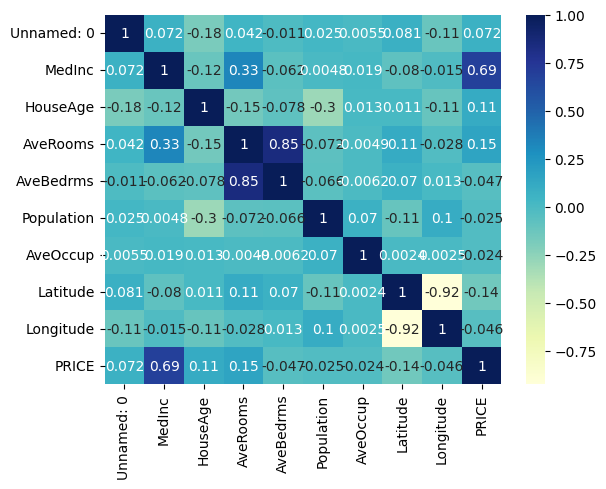

In [64]:
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>],
       [<Axes: title={'center': 'AveRooms'}>,
        <Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': 'AveOccup'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'PRICE'}>, <Axes: >, <Axes: >]],
      dtype=object)

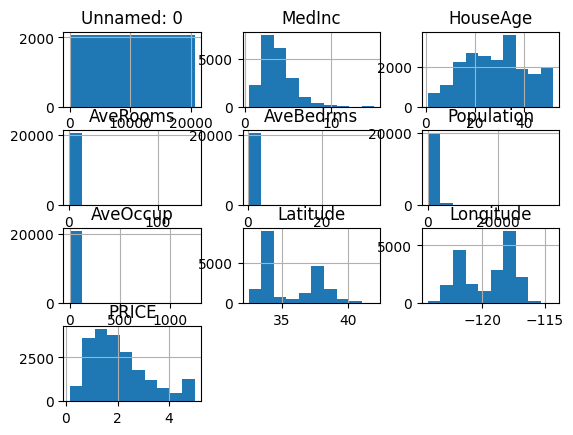

In [65]:
df.hist()

#### REGPLOTNI qarab koramiz

RMSE (Unnamed: 0)= 1.1523644641998025
Model Coefficients (Unnamed: 0): 1.4607261049266875e-05
Model Intercept: 1.9177254537297135
y = 0.0 * x + 1.9

-----------------------------------------------------------

RMSE (MedInc)= 0.8512453624841145
Model Coefficients (MedInc): 0.4229141984315926
Model Intercept: 0.43297769801481856
y = 0.4 * x + 0.4

-----------------------------------------------------------

RMSE (HouseAge)= 1.1477081823179065
Model Coefficients (HouseAge): 0.009512177290183402
Model Intercept: 1.7960200821929053
y = 0.0 * x + 1.8

-----------------------------------------------------------

RMSE (AveRooms)= 1.1451374578188391
Model Coefficients (AveRooms): 0.08031437449012692
Model Intercept: 1.63266897080774
y = 0.1 * x + 1.6

-----------------------------------------------------------

RMSE (AveBedrms)= 1.154491893366537
Model Coefficients (AveBedrms): -0.1364586095228772
Model Intercept: 2.217637698131994
y = -0.1 * x + 2.2

-------------------------------------------

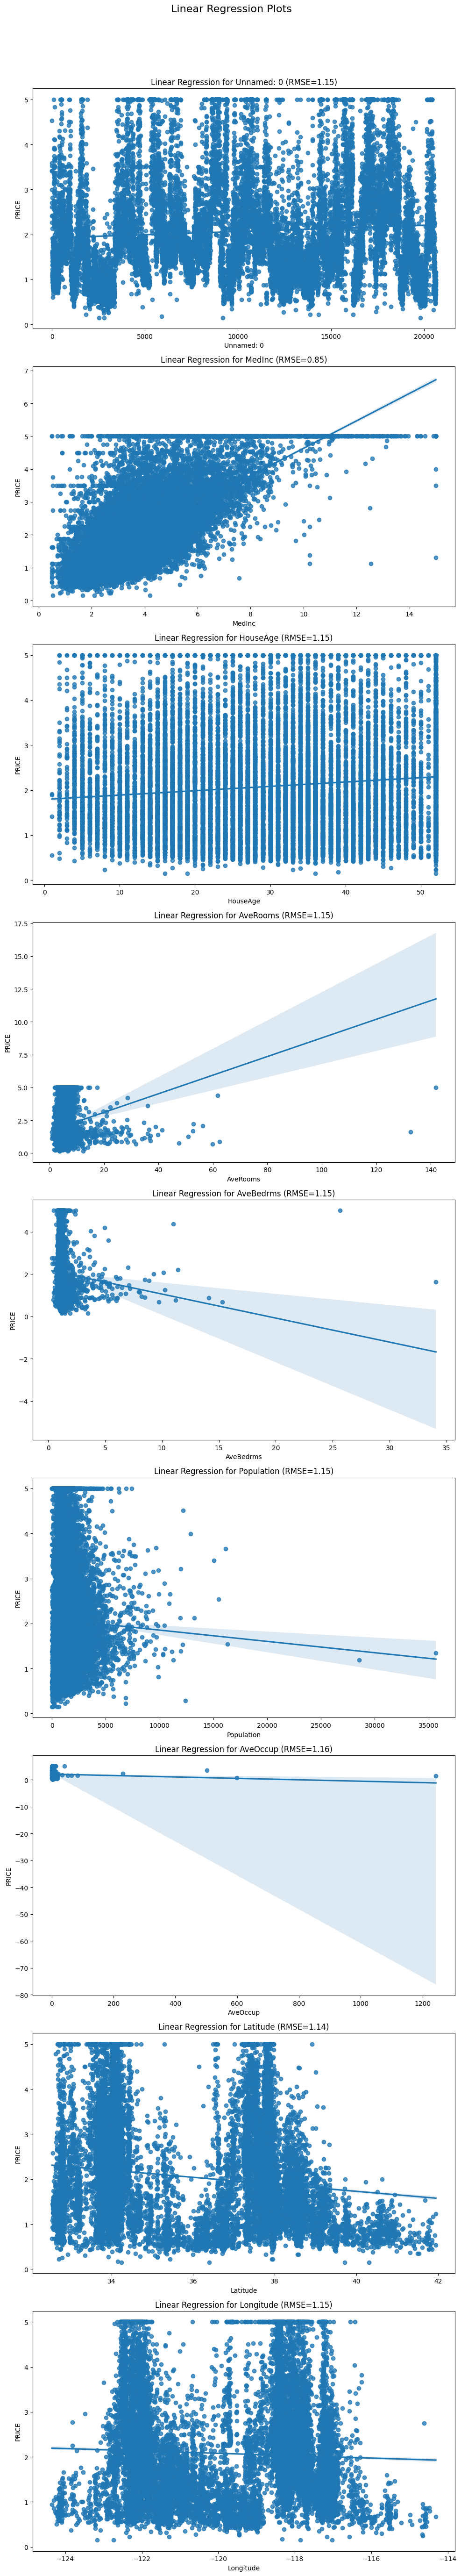

In [71]:

X0=list(df.drop('PRICE', axis=1).columns)
y=df['PRICE']


fig, axes = plt.subplots(nrows=len(X0),ncols=1,figsize=(10,6*len(X0)))

for index,i in enumerate(X0):
    X1 = df[[i]]
    X1_train,X1_test,y_train,y_test = train_test_split(X1,y,test_size=0.3,random_state=0) 
    reg_all = LinearRegression()
    reg_all.fit(X1_train,y_train)
    y_pred = reg_all.predict(X1_test)
    RMSE = np.sqrt(MSE(y_test, y_pred))
    
    print(f"RMSE ({i})= {RMSE}")
    print(f"Model Coefficients ({i}): {reg_all.coef_[0]}")
    print("Model Intercept:", reg_all.intercept_)
    print(f"y = {reg_all.coef_[0]:.1f} * x + {reg_all.intercept_:.1f}")
    print("\n-----------------------------------------------------------\n")
    
    sns.regplot(x=i, y="PRICE", data=df, ax=axes[index])
    axes[index].set_title(f"Linear Regression for {i} (RMSE={RMSE:.2f})")
    axes[index].set_xlabel(i)
    axes[index].set_ylabel("PRICE")    
    
    
fig.suptitle("Linear Regression Plots", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
    
    
    
    
    

#### RMSE tahlil qilamiz va modellarni koramiz har bir feature ni birma bir qoshib

In [67]:
df.columns

Index(['Unnamed: 0', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
       'Population', 'AveOccup', 'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [68]:


cols = ["MedInc"]
X = df[cols]
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model= LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
RMSE = np.sqrt(MSE(y_test, y_pred))

print(f"RMSE: {RMSE}")

RMSE: 0.8512453624841145


### MedInc va PRICE

In [73]:
cols = ["MedInc"]
X = df[cols]
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
kf = KFold(n_splits=5, shuffle=True, random_state=0)
reg = LinearRegression()
RMSE_Scorer = make_scorer(MSE)
CV_Results = cross_val_score(reg, X_train,y_train,cv=kf, scoring=RMSE_Scorer)
print(CV_Results)
print(CV_Results.mean())
print(CV_Results.std())

[0.68583227 0.71778473 0.64870844 0.68034385 0.72522531]
0.6915789225868043
0.027625902991662902


### MedInc, HouseAge vs PRICE

In [78]:
cols = ["MedInc","HouseAge"]
X = df[cols]
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
kf = KFold(n_splits=5, shuffle=True, random_state=0)
reg = LinearRegression()
RMSE_Scorer = make_scorer(MSE)
CV_Results = cross_val_score(reg, X_train,y_train,cv=kf, scoring=RMSE_Scorer)
print(CV_Results)
print(CV_Results.mean())
print(CV_Results.std())

[0.63770467 0.66529611 0.60672091 0.62980823 0.68145013]
0.6441960083989441
0.026406866689125466


### MedInc, HouseAge, AveRooms vs PRICE

In [79]:
cols = ["MedInc","HouseAge","AveRooms"]
X = df[cols]
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
kf = KFold(n_splits=5, shuffle=True, random_state=0)
reg = LinearRegression()
RMSE_Scorer = make_scorer(MSE)
CV_Results = cross_val_score(reg, X_train,y_train,cv=kf, scoring=RMSE_Scorer)
print(CV_Results)
print(CV_Results.mean())
print(CV_Results.std())

[0.63174116 0.65957323 0.60563638 0.6195188  0.67330181]
0.6379542735631899
0.025058903554036


### MedInc, HouseAge, AveRooms,AveBedrms vs PRICE

In [81]:
cols = ["MedInc","HouseAge","AveRooms",'AveBedrms']
X = df[cols]
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
kf = KFold(n_splits=5, shuffle=True, random_state=0)
reg = LinearRegression()
RMSE_Scorer = make_scorer(MSE)
CV_Results = cross_val_score(reg, X_train,y_train,cv=kf, scoring=RMSE_Scorer)
print(CV_Results)
print(CV_Results.mean())
print(CV_Results.std())

[0.59995785 0.62739793 0.58272945 0.57699691 0.63035632]
0.6034876923895682
0.02208505793863927


### MedInc, HouseAge, AveRooms,AveBedrms, Population vs PRICE

In [82]:
cols = ["MedInc","HouseAge","AveRooms",'AveBedrms',"Population"]
X = df[cols]
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
kf = KFold(n_splits=5, shuffle=True, random_state=0)
reg = LinearRegression()
RMSE_Scorer = make_scorer(MSE)
CV_Results = cross_val_score(reg, X_train,y_train,cv=kf, scoring=RMSE_Scorer)
print(CV_Results)
print(CV_Results.mean())
print(CV_Results.std())

[0.59957215 0.62708002 0.58328398 0.57695233 0.63021567]
0.6034208286274525
0.021902543389304214


### MedInc, HouseAge, AveRooms,AveBedrms, Population, AveOccup vs PRICE

In [83]:
cols = ["MedInc","HouseAge","AveRooms",'AveBedrms',"Population","AveOccup"]
X = df[cols]
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
kf = KFold(n_splits=5, shuffle=True, random_state=0)
reg = LinearRegression()
RMSE_Scorer = make_scorer(MSE)
CV_Results = cross_val_score(reg, X_train,y_train,cv=kf, scoring=RMSE_Scorer)
print(CV_Results)
print(CV_Results.mean())
print(CV_Results.std())

[0.59719796 0.62289111 0.58184969 0.57542581 0.6387068 ]
0.6032142717030686
0.02413187618343908


Bunda ortacha hatolik oshib ketdi tushish orninga

### MedInc, HouseAge, AveRooms,AveBedrms, Population, AveOccup, Latitude, Longitude vs PRICE

In [84]:
cols = ["MedInc","HouseAge","AveRooms",'AveBedrms',"Population","AveOccup","Latitude","Longitude"]
X = df[cols]
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
kf = KFold(n_splits=5, shuffle=True, random_state=0)
reg = LinearRegression()
RMSE_Scorer = make_scorer(MSE)
CV_Results = cross_val_score(reg, X_train,y_train,cv=kf, scoring=RMSE_Scorer)
print(CV_Results)
print(CV_Results.mean())
print(CV_Results.std())

[0.51251605 0.53402173 0.51818118 0.49469554 0.55479494]
0.5228418888404505
0.02033001745412581


In [75]:
df.columns

Index(['Unnamed: 0', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
       'Population', 'AveOccup', 'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

Bundan xulosa qilib aytishimiz mumkinki, features soni kop bolsa va bogliqliklar yaxshi mavjuda bolsa bashorat modelining nisbiy hatoliklar RMSE va MSE past bolar ekan